In [0]:
from pyspark.sql.functions import monotonically_increasing_id, col
from pyspark.ml.recommendation import ALS
import matplotlib.pyplot as plt

# 1. Load and create synthetic Customer_ID
sales = spark.read.format("delta").load("/mnt/cleaned_data/sales_df")
sales_with_id = sales.withColumn("Customer_ID", monotonically_increasing_id())

In [0]:
als_data = sales_with_id.selectExpr("Customer_ID as userId", "Product_ID as itemId", "Quantity_Sold as rating").dropna()


In [0]:
# 3. Train ALS model
als = ALS(userCol="userId", itemCol="itemId", ratingCol="rating", coldStartStrategy="drop")
model = als.fit(als_data)

In [0]:
recs = model.recommendForAllUsers(5)

In [0]:
uid = recs.select("userId").limit(1).toPandas().iloc[0, 0]
user_recs = recs.filter(col("userId") == uid).selectExpr("explode(recommendations)").toPandas()['col'].tolist()

In [0]:
display(recs.filter(col("userId") == uid).selectExpr("explode(recommendations)"))

col
"List(1052, 17.994228)"
"List(1025, 16.703522)"
"List(1041, 15.739672)"
"List(1054, 10.029377)"
"List(1045, 9.676688)"


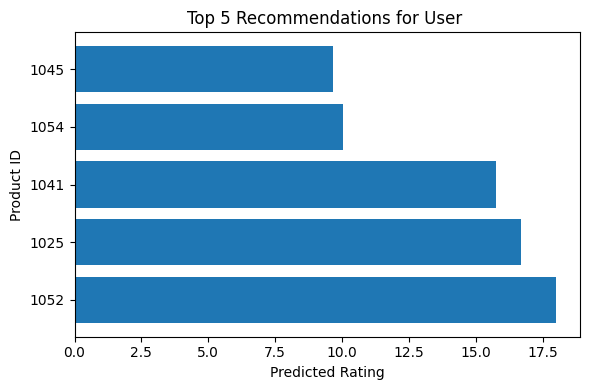

In [0]:
plt.figure(figsize=(6, 4))
plt.barh([str(r['itemId']) for r in user_recs], [r['rating'] for r in user_recs])
plt.title(f"Top 5 Recommendations for User ")
plt.xlabel("Predicted Rating")
plt.ylabel("Product ID")
plt.tight_layout()


In [0]:
from pyspark.sql.functions import explode, col

# Flatten the recommendations column
flat_recs = recs.select(
    col("userId"),
    explode("recommendations").alias("recommendation")
).select(
    col("userId"),
    col("recommendation.itemId").alias("Product_ID"),
    col("recommendation.rating").alias("Predicted_Rating")
)

In [0]:
display(flat_recs)


userId,Product_ID,Predicted_Rating
0,1052,17.994228
0,1025,16.703522
0,1041,15.739672
0,1054,10.029377
0,1045,9.676688
1,1093,16.992664
1,1078,13.991183
1,1066,13.438024
1,1046,11.73387
1,1068,11.550636


In [0]:
jdbc_url = "jdbc:sqlserver://geeta.database.windows.net:1433;databaseName=db_dev"

connection_properties = {
    "user": "geeta@geeta",  
    "password": "Chaitu@13",  
    "driver": "com.microsoft.sqlserver.jdbc.SQLServerDriver"
}


In [0]:
flat_recs.write.jdbc(
    url=jdbc_url,
    table="Product_Recommendations",
    mode="overwrite",   # or "append"
    properties=connection_properties
)